In [7]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotting

## Temperature functions

In [8]:
high_temp = 50
low_temp = 0.01
n_temps = 10000

# temperature functions used
wave_func = lambda x: x+np.exp(-0.001*-x)*np.sin(1*-x)
exponential_even = np.geomspace(high_temp, low_temp, n_temps)
exponential_0003 = np.exp(-np.arange(0, n_temps) * 30 / n_temps) * high_temp
linear = np.linspace(high_temp, low_temp, n_temps)


wavy_lin = linear+np.exp(-0.02*-linear)*np.sin(1*-linear)

Markov chain length of 1.


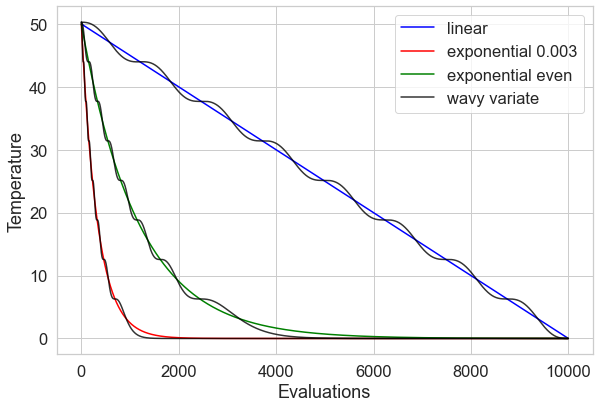

In [9]:
# sns.set_context(font_scale=1)
print("Markov chain length of 1.")

sns.set(font_scale = 1.5,style='whitegrid')
# sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(12*0.8,8*0.8))
offset_x = np.arange(n_temps)-0 # offest of wavy variates

# non wavy
ax1 = sns.lineplot(linear,label='linear',color='blue',alpha=1)
sns.lineplot(exponential_0003,label='exponential 0.003',color='red',alpha=1,ax=ax1)
sns.lineplot(exponential_even,label='exponential even',color='green',alpha=1,ax=ax1)

# wavy variates
sns.lineplot(x=offset_x, y=wave_func(linear),color='black',alpha=.8, label='wavy variate',ax=ax1)
sns.lineplot(x=offset_x, y=wave_func(exponential_even),color='black',alpha=.8,ax=ax1)
sns.lineplot(x=offset_x, y=wave_func(exponential_0003),color='black',alpha=.8,ax=ax1)
plt.xlabel("Evaluations", fontsize=18)
plt.ylabel("Temperature", fontsize=18)

plt.savefig("Images/Cooling_Schedules.svg", dpi=300, bbox_inches='tight')

In [10]:
# no force
fname1_nf = 'linear_data_100runs_noforce.csv'
fname2_nf = 'ex_even_data_100runs_noforce.csv'
fname3_nf = 'ex_0003_data_100runs_noforce.csv'

# force
fname1_f = 'linear_data_100runs_force.csv'
fname2_f = 'ex_even_data_100runs_force.csv'
fname3_f = 'ex_0003_data_100runs_force.csv'

# force
fname1_lf = 'linear_data_100runs_lateforce.csv'
fname2_lf = 'ex_even_data_100runs_lateforce.csv'
fname3_lf = 'ex_0003_data_100runs_lateforce.csv'

names = 'linear', "exponential even spacing", "exponential 0.003"

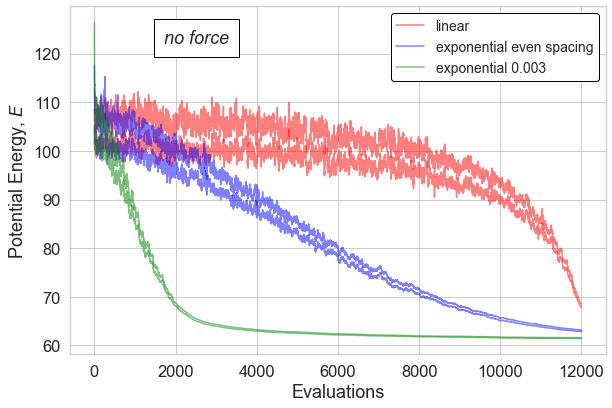

In [11]:
plotting.plot_convergence_compare(fname1_nf, fname2_nf, fname3_nf,'no force',pic_name='noforce_convergence_ci', names=names)

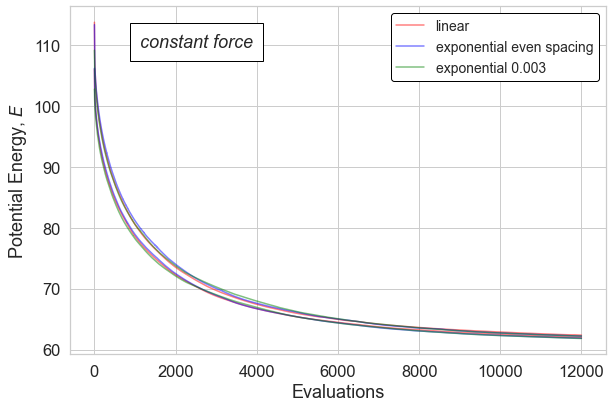

In [12]:
plotting.plot_convergence_compare(fname1_f, fname2_f, fname3_f, 'constant force' ,pic_name='constant_force_convergence_ci', names=names)

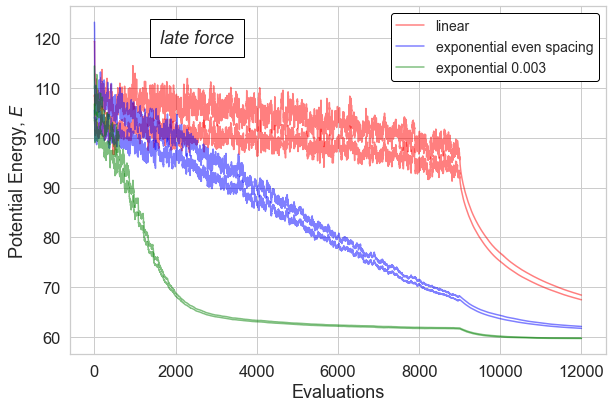

In [13]:
plotting.plot_convergence_compare(fname1_lf, fname2_lf, fname3_lf,'late force', pic_name='late_force_convergence_ci', names=names)

# P-value
Plotting p-value results from t-tests over 100 simulations per cooling schedule and force type.

In [14]:
%matplotlib inline

In [ ]:
plotting.plot_convergence_pval(fname1_nf, fname2_nf, fname3_nf,pic_name='pval_cooling',
                      names=[(names[0], names[1]), (names[0], names[2]), (names[1], names[2])],first_n_iters=3000)
print("Comparing Cooling schedules")

In [ ]:
names = 'no force', "constant force", "late force"
plotting.plot_convergence_pval(fname3_nf, fname3_f, fname3_lf,pic_name='pval_forces',
                      names=[(names[0], names[1]), (names[0], names[2]), (names[1], names[2])],first_n_iters=7800)
print("Comparing Force implementations on p-value of convergence for the most promising cooling schedule: exponential 0.003")
